
## Experiment 4
The goal of this project is to query the Northwinds database to get the data needed to perform FOUR statistical analyses and hypothesis tests to generate analytical insights that can be of value to the company.


#### Experiment 4 - Which shippers are the fastest?

In [81]:
# How long does it take between the order date and the ship date.

In [119]:
# Import libraries
import pandas as pd
import sqlite3
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [120]:
# What are the different shipping companies?

In [121]:
# Load connection and cursor
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

# Join some of the tables
cur.execute("""SELECT *
               FROM Shipper
               ;""")
df4a = pd.DataFrame(cur.fetchall())
df4a.columns = [x[0] for x in cur.description]
print(len(df4a))
df4a.head()

3


,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [122]:
# Create the dataframe

In [123]:
# Load connection and cursor
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

# Join some of the tables
cur.execute("""SELECT OrderDate, ShippedDate, ShipVia, ShipRegion
               FROM 'Order'
               Order By ShipVia
               ;""")
df4 = pd.DataFrame(cur.fetchall())
df4.columns = [x[0] for x in cur.description]
print(len(df4))
df4.head()

830


,OrderDate,ShippedDate,ShipVia,ShipRegion
0,2012-07-05,2012-07-10,1,Western Europe
1,2012-07-08,2012-07-15,1,Western Europe
2,2012-07-17,2012-07-23,1,Western Europe
3,2012-07-19,2012-07-29,1,Western Europe
4,2012-07-25,2012-08-12,1,Western Europe


In [87]:
# Load connection and cursor
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

# Join some of the tables
cur.execute("""SELECT *
               FROM 'Order'
               Order By ShipVia
               ;""")
df4 = pd.DataFrame(cur.fetchall())
df4.columns = [x[0] for x in cur.description]
print(len(df4))
df4.head()

830


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
1,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
2,10258,ERNSH,1,2012-07-17,2012-08-14,2012-07-23,1,140.51,Ernst Handel,Kirchgasse 6,Graz,Western Europe,8010,Austria
3,10260,OTTIK,4,2012-07-19,2012-08-16,2012-07-29,1,55.09,Ottilies Käseladen,Mehrheimerstr. 369,Köln,Western Europe,50739,Germany
4,10265,BLONP,2,2012-07-25,2012-08-22,2012-08-12,1,55.28,Blondel père et fils,"24, place Kléber",Strasbourg,Western Europe,67000,France


In [124]:
# I can't join 'Orders' and 'Shippers' in SQL since they do not have a common key - even though
# 'ShipperId' is essentially the same as 'ShipVia'!

In [125]:
# Look at the total orders by different Shipping Companies

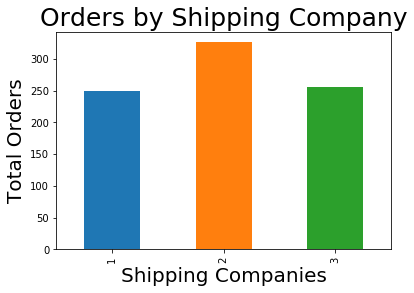

In [126]:
df4.groupby('ShipVia').size().plot(kind='bar')
plt.ylabel("Total Orders",fontsize=20)
plt.xlabel("Shipping Companies", fontsize=20)
plt.title('Orders by Shipping Company', fontsize=25)
plt.show()
plt.show()

In [127]:
df4.ShipVia.value_counts()

2    326
3    255
1    249
Name: ShipVia, dtype: int64

In [128]:
# Explore the data

In [129]:
# I was thinking of including Frieght but I can't find much information on what it represents.
#df4.Freight.describe()

In [130]:
# Look for rows with missing data

In [131]:
df4.ShippedDate.describe()

count            809
unique           387
top       2014-04-10
freq               8
Name: ShippedDate, dtype: object

In [132]:
df4.ShippedDate.tail(15)

815          None
816    2014-04-17
817    2014-04-15
818          None
819    2014-04-24
820    2014-04-23
821    2014-04-23
822    2014-04-22
823          None
824    2014-05-01
825    2014-04-30
826          None
827    2014-05-01
828          None
829          None
Name: ShippedDate, dtype: object

In [133]:
df4.ShippedDate.isnull().sum()

21

In [134]:
# Get rid of null data

In [135]:
df4 = df4[pd.notnull(df4['ShippedDate'])]
df4.describe()

,ShipVia
count,809.000000
mean,2.004944
std,0.781896
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


In [136]:
df4.ShippedDate.describe()

count            809
unique           387
top       2014-04-10
freq               8
Name: ShippedDate, dtype: object

In [137]:
# Check OrderDate for missing data just in case

In [138]:
df4.OrderDate.isnull().sum()

0

In [139]:
# Create new column with the number of days it took to ship out - DaysToShipOut

In [140]:
from datetime import datetime
df4['DaysToShipOut'] = df4.apply(lambda row: datetime.strptime(row.ShippedDate, "%Y-%m-%d") - datetime.strptime(row.OrderDate, "%Y-%m-%d"), axis = 1)

df4.head()

,OrderDate,ShippedDate,ShipVia,ShipRegion,DaysToShipOut
0,2012-07-05,2012-07-10,1,Western Europe,5 days
1,2012-07-08,2012-07-15,1,Western Europe,7 days
2,2012-07-17,2012-07-23,1,Western Europe,6 days
3,2012-07-19,2012-07-29,1,Western Europe,10 days
4,2012-07-25,2012-08-12,1,Western Europe,18 days


In [141]:
df4.DaysToShipOut.describe()

count                       809
mean     8 days 11:48:25.809641
std      6 days 20:07:42.124841
min             1 days 00:00:00
25%             4 days 00:00:00
50%             7 days 00:00:00
75%             9 days 00:00:00
max            37 days 00:00:00
Name: DaysToShipOut, dtype: object

In [142]:
a = df4.DaysToShipOut[0]
print(type(a))
print(a)

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
5 days 00:00:00


In [143]:
df4['ShipOutInteger'] = df4['DaysToShipOut'].dt.days.astype('int16')
df4.head()

,OrderDate,ShippedDate,ShipVia,ShipRegion,DaysToShipOut,ShipOutInteger
0,2012-07-05,2012-07-10,1,Western Europe,5 days,5
1,2012-07-08,2012-07-15,1,Western Europe,7 days,7
2,2012-07-17,2012-07-23,1,Western Europe,6 days,6
3,2012-07-19,2012-07-29,1,Western Europe,10 days,10
4,2012-07-25,2012-08-12,1,Western Europe,18 days,18


In [144]:
a = df4.ShipOutInteger[0]
print(type(a))
print(a)

<class 'numpy.int16'>
5


In [145]:
df4.ShipOutInteger.describe()

count    809.000000
mean       8.491965
std        6.838682
min        1.000000
25%        4.000000
50%        7.000000
75%        9.000000
max       37.000000
Name: ShipOutInteger, dtype: float64

In [146]:
df4.head()

,OrderDate,ShippedDate,ShipVia,ShipRegion,DaysToShipOut,ShipOutInteger
0,2012-07-05,2012-07-10,1,Western Europe,5 days,5
1,2012-07-08,2012-07-15,1,Western Europe,7 days,7
2,2012-07-17,2012-07-23,1,Western Europe,6 days,6
3,2012-07-19,2012-07-29,1,Western Europe,10 days,10
4,2012-07-25,2012-08-12,1,Western Europe,18 days,18


In [147]:
df4 = df4.drop(['OrderDate', 'ShippedDate', 'ShipRegion', 'DaysToShipOut'], axis=1)

In [148]:
df4.head()

,ShipVia,ShipOutInteger
0,1,5
1,1,7
2,1,6
3,1,10
4,1,18


In [149]:
df4.ShipOutInteger.describe()

count    809.000000
mean       8.491965
std        6.838682
min        1.000000
25%        4.000000
50%        7.000000
75%        9.000000
max       37.000000
Name: ShipOutInteger, dtype: float64

In [150]:
#df4new.loc[df4new['ShipVia'] == 1, 'ShipVia'] = 'Speedy Shipping'
#df4new.head()

In [151]:
#df4new.loc[df4new['ShipVia'] == 2, 'ShipVia'] = 'United Package'
#df4new.head()

In [152]:
#df4new.loc[df4new['ShipVia'] == 3, 'ShipVia'] = 'Federal Express'
#df4new.tail()

In [153]:
#df4new.describe()

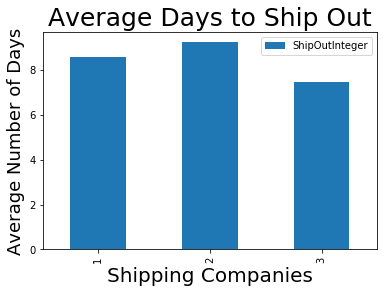

In [154]:
df4.groupby('ShipVia').mean().plot(kind='bar')
plt.ylabel("Average Number of Days",fontsize=18)
plt.xlabel("Shipping Companies", fontsize=20)
plt.title('Average Days to Ship Out', fontsize=25)
plt.show()

In [38]:
#df4new = pd.concat([df4a, df4], join='outer', axis=1)
#df4new

In [39]:
# No numeric data to aggregate
#totalorders = df4.groupby('CompanyName').agg({'ShipOutInteger': ['mean', 'min', 'max']})
#totalorders

In [40]:
# Look to see how different shippers compare

In [41]:
#df4list = df4.groupby('ShipVia').agg({'ShipOutInteger':lambda x: list(x)})
#df4list

In [42]:
#df4list['ShipVia']

In [43]:
df4.head()

,ShipVia,ShipOutInteger
0,1,5
1,1,7
2,1,6
3,1,10
4,1,18


In [44]:
df4.ShipVia.value_counts()

2    315
3    249
1    245
Name: ShipVia, dtype: int64

In [45]:
# Look at the total days to ship out by different companies

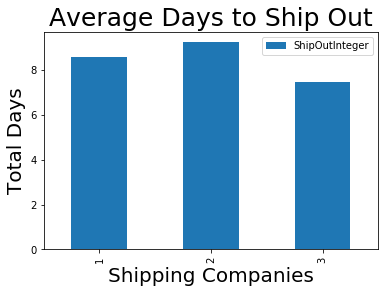

In [46]:
#plt.clf()
df4.groupby('ShipVia').mean().plot(kind='bar')
plt.ylabel("Total Days",fontsize=20)
plt.xlabel("Shipping Companies", fontsize=20)
plt.title('Average Days to Ship Out', fontsize=25)
plt.show()


In [47]:
df4.head()

,ShipVia,ShipOutInteger
0,1,5
1,1,7
2,1,6
3,1,10
4,1,18


In [48]:
# Split the data accourding to shipping company

In [49]:

#df4 = df4.groupby(['ShipVia'])['ShipOutInteger'].sum().reset_index()
#df4

In [50]:
# Join with Shipping Table to get CompanyName

In [52]:
df4new = pd.concat([df4a, df4list], join='outer', axis=1)
df4new


NameError: name 'df4list' is not defined

In [53]:
# Drop unused columns

In [54]:
#df4new = df4.drop(['Id', 'Phone', 'ShipVia'], axis=1)
#df4new

In [55]:
#df4 = df4.drop(['DaysToShipOut'], axis=1)
#df4

In [56]:
df4.groupby('CompanyName').sum().plot(kind='bar')
plt.ylabel("Days To Ship Out",fontsize=20)
plt.xlabel("Shipping Companies", fontsize=20)
plt.title('Total Days to Ship Out', fontsize=25)
plt.show()


KeyError: 'CompanyName'

In [57]:
# Create the Experiment

## The Null Hypothesis, $H_0$
The Null Hypothesis for Experiment 4 is that a there is no difference in how the Shipping Company takes to ship out the order.

## The Alternative Hypothesis, $H_1$
The Alternative Hypothesis for Experiment 4 is that certains company's take longer (or not as long) as others to ship out orders.

In [58]:
formula = 'ShipVia ~ ShipOutInteger'
lm = ols(formula, df4).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                    sum_sq     df         F    PR(>F)
ShipOutInteger    1.971818    1.0  3.234207  0.072489
Residual        492.008404  807.0       NaN       NaN


In [59]:
df4 = df4.drop(['OrderDate', 'ShippedDate','DaysToShipOut','ShipRegion'], axis=1)

KeyError: "['OrderDate' 'ShippedDate' 'DaysToShipOut' 'ShipRegion'] not found in axis"

In [60]:
speedy = df4[df4['ShipVia'] == 1]
print(len(speedy))
#print(df4.groupby('ShipVia')['ShipOutInteger'].sum()[1])
speedy.head()

245


,ShipVia,ShipOutInteger
0,1,5
1,1,7
2,1,6
3,1,10
4,1,18


In [61]:
speedy.reset_index(drop=True, inplace=True)
speedy.head()

,ShipVia,ShipOutInteger
0,1,5
1,1,7
2,1,6
3,1,10
4,1,18


In [62]:
speedy.describe()

,ShipVia,ShipOutInteger
count,245.0,245.000000
mean,1.0,8.571429
std,0.0,6.777494
min,1.0,1.000000
25%,1.0,5.000000
50%,1.0,7.000000
75%,1.0,9.000000
max,1.0,37.000000


In [63]:
united = df4[df4['ShipVia'] == 2]
print(len(united))
#print(df4.groupby('ShipVia')['ShipOutInteger'].sum()[2])
united.head()

315


,ShipVia,ShipOutInteger
249,2,4
250,2,2
251,2,6
252,2,12
253,2,2


In [64]:
united = united.sample(n=245, random_state=2)
united.head()

,ShipVia,ShipOutInteger
498,2,20
474,2,9
256,2,4
437,2,12
518,2,9


In [65]:
united.reset_index(drop=True, inplace=True)
united.head()

,ShipVia,ShipOutInteger
0,2,20
1,2,9
2,2,4
3,2,12
4,2,9


In [66]:
united.describe()

,ShipVia,ShipOutInteger
count,245.0,245.000000
mean,2.0,9.236735
std,0.0,7.540674
min,2.0,1.000000
25%,2.0,5.000000
50%,2.0,7.000000
75%,2.0,10.000000
max,2.0,37.000000


In [67]:
federal = df4[df4['ShipVia'] == 3]
print(len(federal))
#print(df4.groupby('ShipVia')['ShipOutInteger'].sum()[3])
federal.head()

249


,ShipVia,ShipOutInteger
575,3,12
576,3,3
577,3,6
578,3,7
579,3,3


In [68]:
federal = federal.sample(n=245, random_state=2)
federal.head()

,ShipVia,ShipOutInteger
761,3,8
665,3,3
741,3,5
800,3,9
666,3,7


In [69]:
federal = federal.reset_index(drop=True)
federal.head()

,ShipVia,ShipOutInteger
0,3,8
1,3,3
2,3,5
3,3,9
4,3,7


In [70]:
federal.describe()

,ShipVia,ShipOutInteger
count,245.0,245.000000
mean,3.0,7.518367
std,0.0,5.709199
min,3.0,1.000000
25%,3.0,4.000000
50%,3.0,6.000000
75%,3.0,9.000000
max,3.0,35.000000


In [71]:
df4again = pd.concat([speedy, united, federal], join='inner', axis=0)
df4again.head()

,ShipVia,ShipOutInteger
0,1,5
1,1,7
2,1,6
3,1,10
4,1,18


In [72]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'ShipVia ~ ShipOutInteger'
lm = ols(formula, df4).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                    sum_sq     df         F    PR(>F)
ShipOutInteger    1.971818    1.0  3.234207  0.072489
Residual        492.008404  807.0       NaN       NaN


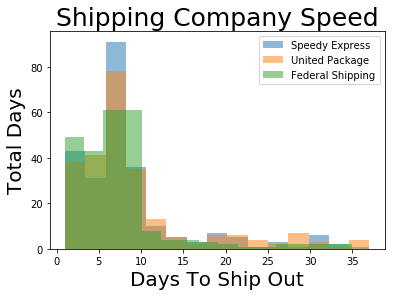

In [73]:
from matplotlib import pyplot
pyplot.hist(speedy.ShipOutInteger, bins=15, alpha=0.5, label='Speedy Express')
pyplot.hist(united.ShipOutInteger, bins=15, alpha=0.5, label='United Package')
pyplot.hist(federal.ShipOutInteger, bins=15, alpha=0.5, label='Federal Shipping')
pyplot.legend(loc='upper right')
pyplot.ylabel("Total Days",fontsize=20)
pyplot.xlabel("Days To Ship Out", fontsize=20)
pyplot.title('Shipping Company Speed', fontsize=25)
pyplot.show()

In [ ]:
#plt.clf()
plt.ylabel("Total Days",fontsize=20)
plt.xlabel("Shipping Companies", fontsize=20)
plt.title('Average Days to Ship Out', fontsize=25)
plt.show()


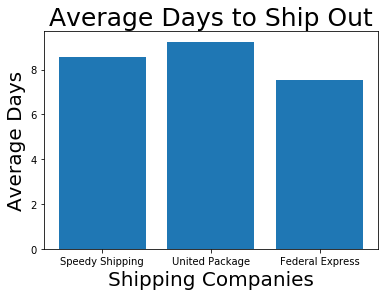

In [158]:
# Make dataset
height = [8.57, 9.24, 7.52]
bars = ('Speedy Shipping', 'United Package', 'Federal Express')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.ylabel("Average Days",fontsize=20)
plt.xlabel("Shipping Companies", fontsize=20)
plt.title('Average Days to Ship Out', fontsize=25)
# Show graphic
plt.show()


In [74]:
# Helpful 

In [75]:
cur.execute("select name from sqlite_master where type = 'table'").fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [76]:
# Cool code to subtract two dates.
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [ ]:
# Another way to turn the timedelta into a float

In [ ]:
#df4['ShipOutInteger'] = pd.to_numeric(df4['DaysToShipOut'].dt.days, downcast='integer')
#df4.head()